# ANALISIS FINANCIERO DE LOS ACTIVOS

In [1]:
#Carga de librerias
import packages.Preprocesamiento as ppr
import statsmodels.api as stm
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from pandas.tseries.offsets import BDay, DateOffset, CustomBusinessDay
import math
import seaborn as sns
colores = ['#9eb5c7', '#225380', '#2dc7c9','#dcdee4']

1. Lectura de archivos

In [2]:
#Carga de datos
def leer_archivos_csv_en_carpeta(carpeta):
    archivos_csv = [archivo for archivo in os.listdir(carpeta) if archivo.endswith('.csv')]
    dataframes = {}
    for archivo in archivos_csv:
        ruta_completa = os.path.join(carpeta, archivo)
        nombre_df = os.path.splitext(archivo)[0] 
        df = pd.read_csv(ruta_completa)
        dataframes[nombre_df] = df
    return dataframes

In [3]:
dataframes = leer_archivos_csv_en_carpeta('./Datos/Transformados/diarios')
for nombre_df, df in dataframes.items():
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    globals()[nombre_df]=df
    print(nombre_df)

AAPL_marketstack
AMGN_marketstack
AXP_marketstack
BA_marketstack
CAT_marketstack
CRM_marketstack
CSCO_marketstack
CVX_marketstack
DIS_marketstack
DOW_marketstack
GS_marketstack
HD_marketstack
IBM_marketstack
INTC_marketstack
JNJ_marketstack
JPM_marketstack
KO_marketstack
MCD_marketstack
MMM_marketstack
MRK_marketstack
MSFT_marketstack
NKE_marketstack
PG_marketstack
TRV_marketstack
UNH_marketstack
V_marketstack


2. Calculo de ratios financieros


In [4]:
tasa_libre_riesgo = 0.01
resultados = {}
for nombre_df, df in dataframes.items():
    df2=df.copy()
    log_returns = np.log(df2['close_cubic']/df2['close_cubic'].shift())#RENDIMIENTO LOGORATIMICO
    daily_std = log_returns.std()
    annualized_std =  daily_std*np.sqrt(252)
    df2['Rentabilidad'] = df2['close_cubic'].pct_change()
    rentabilidad_anual = ((1 + df2['Rentabilidad']).prod())**(252/len(df2)) - 1
    sharpe_ratio2 = (rentabilidad_anual - tasa_libre_riesgo) / annualized_std
    rentabilidades_negativas = df2[df2['Rentabilidad'] < 0]['Rentabilidad']
    volatilidad_negativa_anual = (rentabilidades_negativas.std())*np.sqrt(252)
    sortino_ratio = (rentabilidad_anual - tasa_libre_riesgo) / volatilidad_negativa_anual
    resultados[nombre_df] = {'Rentabilidad Anual': rentabilidad_anual,
                             'Volatilidad Diaria':daily_std, 'Volatilidad Anual':annualized_std, 'Ratio de Sharpe':sharpe_ratio2,'Ratio Sortino': sortino_ratio}
resultados_df = pd.DataFrame.from_dict(resultados, orient='index')
resultados_df

,Rentabilidad Anual,Volatilidad Diaria,Volatilidad Anual,Ratio de Sharpe,Ratio Sortino
AAPL_marketstack,-0.534528,0.083269,1.321850,-0.411944,-0.522648
AMGN_marketstack,0.049318,0.016481,0.261621,0.150287,0.206624
AXP_marketstack,0.627235,0.024751,0.392908,1.570941,2.070890
BA_marketstack,0.533619,0.036591,0.580870,0.901439,1.250375
CAT_marketstack,0.679873,0.019104,0.303271,2.208826,3.043115
CRM_marketstack,0.354758,0.023202,0.368323,0.936023,1.589126
CSCO_marketstack,0.094249,0.031135,0.494256,0.170457,0.192317
CVX_marketstack,0.116304,0.029336,0.465690,0.228273,0.274238
DIS_marketstack,0.420158,0.027914,0.443119,0.925616,1.163299
DOW_marketstack,0.546412,0.137656,2.185216,0.245473,0.470514


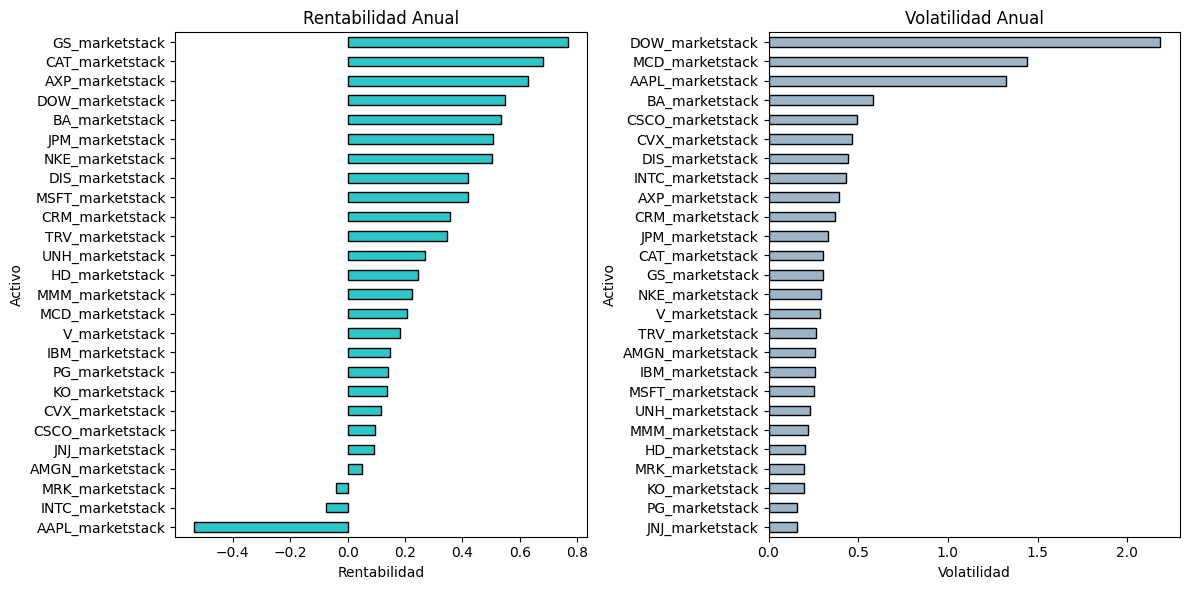

In [5]:
#Graficos de barras de la rentabilidad anual y volatilidad anual 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras de Rentabilidad Anual
rent = resultados_df['Rentabilidad Anual'].sort_values(ascending=True).plot.barh(ax=ax1, color=colores[2], edgecolor='black')
ax1.set_title('Rentabilidad Anual')
ax1.set_xlabel('Rentabilidad')
ax1.set_ylabel('Activo')


# Gráfico de barras de Volatilidad Anual
vol = resultados_df['Volatilidad Anual'].sort_values(ascending=True).plot.barh(ax=ax2, color=colores[0], edgecolor='black')
ax2.set_title('Volatilidad Anual')
ax2.set_xlabel('Volatilidad')
ax2.set_ylabel('Activo')


plt.tight_layout()
plt.show()





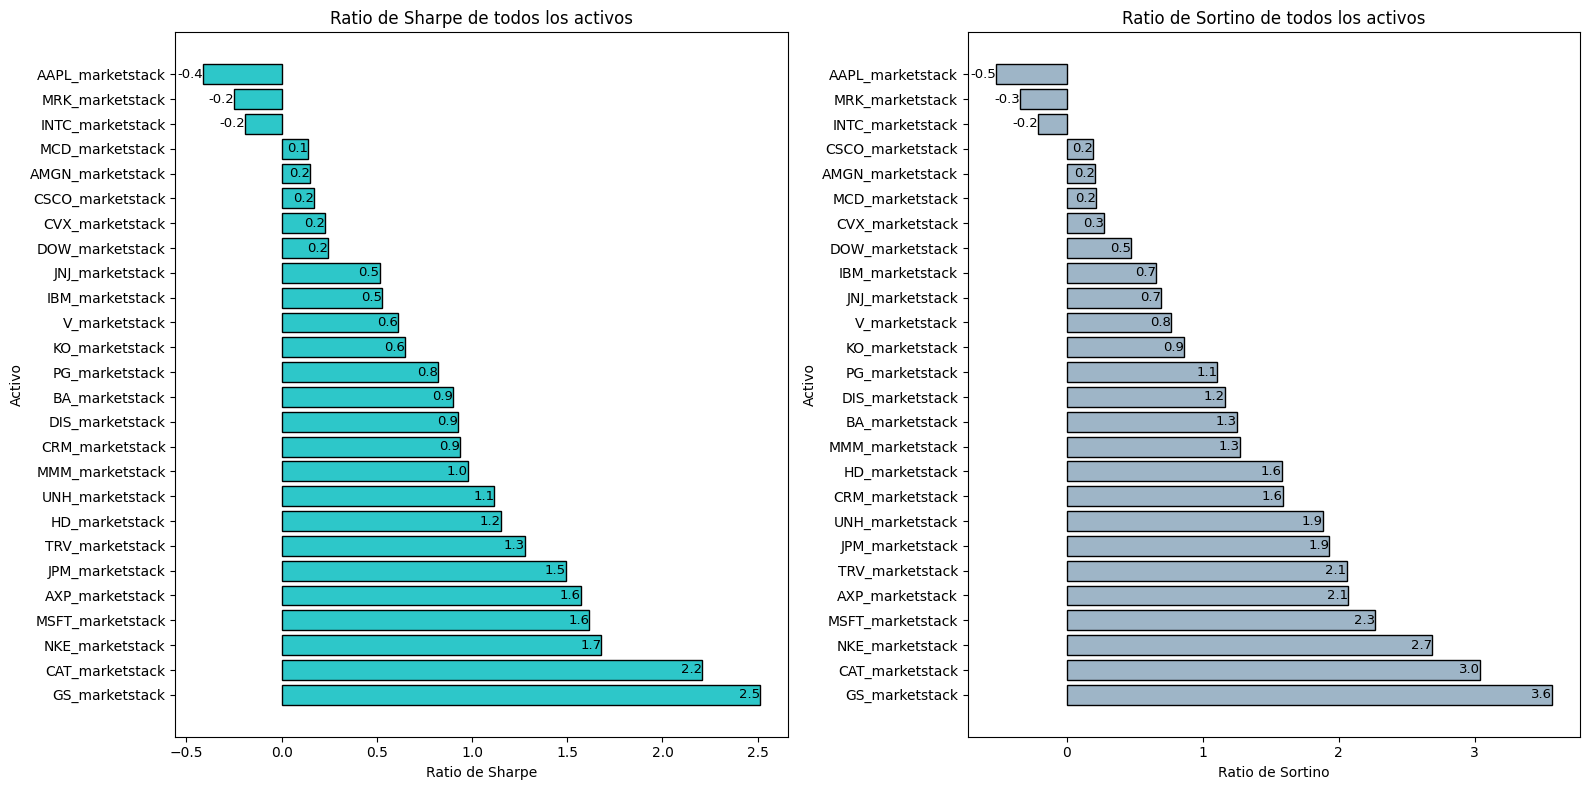

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras - Ratio de Sharpe
resultados_df.sort_values(by='Ratio de Sharpe', ascending=False, inplace=True)
sharpe_bars = ax1.barh(resultados_df.index, resultados_df['Ratio de Sharpe'], color='#2dc7c9', edgecolor='black')
ax1.set_xlabel('Ratio de Sharpe')
ax1.set_title('Ratio de Sharpe de todos los activos')
ax1.set_ylabel('Activo')


for bar in sharpe_bars:
    width = bar.get_width()
    label_x_pos = width - 0.0  # Ajusta la posición de la etiqueta numérica dentro de la barra
    ax1.annotate(f'{width:.1f}', (label_x_pos, bar.get_y() + bar.get_height() / 2),
                 color='black', fontsize=9.5, va='center', ha='right')

# Gráfico de barras - Ratio de Sortino
resultados_df.sort_values(by='Ratio Sortino', ascending=False, inplace=True)
sortino_bars = ax2.barh(resultados_df.index, resultados_df['Ratio Sortino'], color=colores[0], edgecolor='black')
ax2.set_title('Ratio de Sortino de todos los activos')
ax2.set_xlabel('Ratio de Sortino')
ax2.set_ylabel('Activo')


for bar in sortino_bars:
    width = bar.get_width()
    label_x_pos = width - 0.0 # Ajusta la posición de la etiqueta numérica dentro de la barra
    ax2.annotate(f'{width:.1f}', (label_x_pos, bar.get_y() + bar.get_height() / 2),
                 color='black', fontsize=9.5, va='center', ha='right')

plt.tight_layout()
plt.show()

In [7]:
#Crear un df de los tres activos seleccionados y sus resultados
df_activos=pd.DataFrame(resultados_df[['Rentabilidad Anual','Volatilidad Anual','Ratio de Sharpe','Ratio Sortino']].loc[['CAT_marketstack','JPM_marketstack','GS_marketstack']].values, columns=['Rentabilidad Anual','Volatilidad Anual','Ratio de Sharpe','Ratio Sortino'], index=['CAT_marketstack','JPM_marketstack','GS_marketstack'])
df_activos

,Rentabilidad Anual,Volatilidad Anual,Ratio de Sharpe,Ratio Sortino
CAT_marketstack,0.679873,0.303271,2.208826,3.043115
JPM_marketstack,0.506178,0.332834,1.490766,1.930639
GS_marketstack,0.767997,0.301934,2.510472,3.570567


3. Graficar algunos resultados

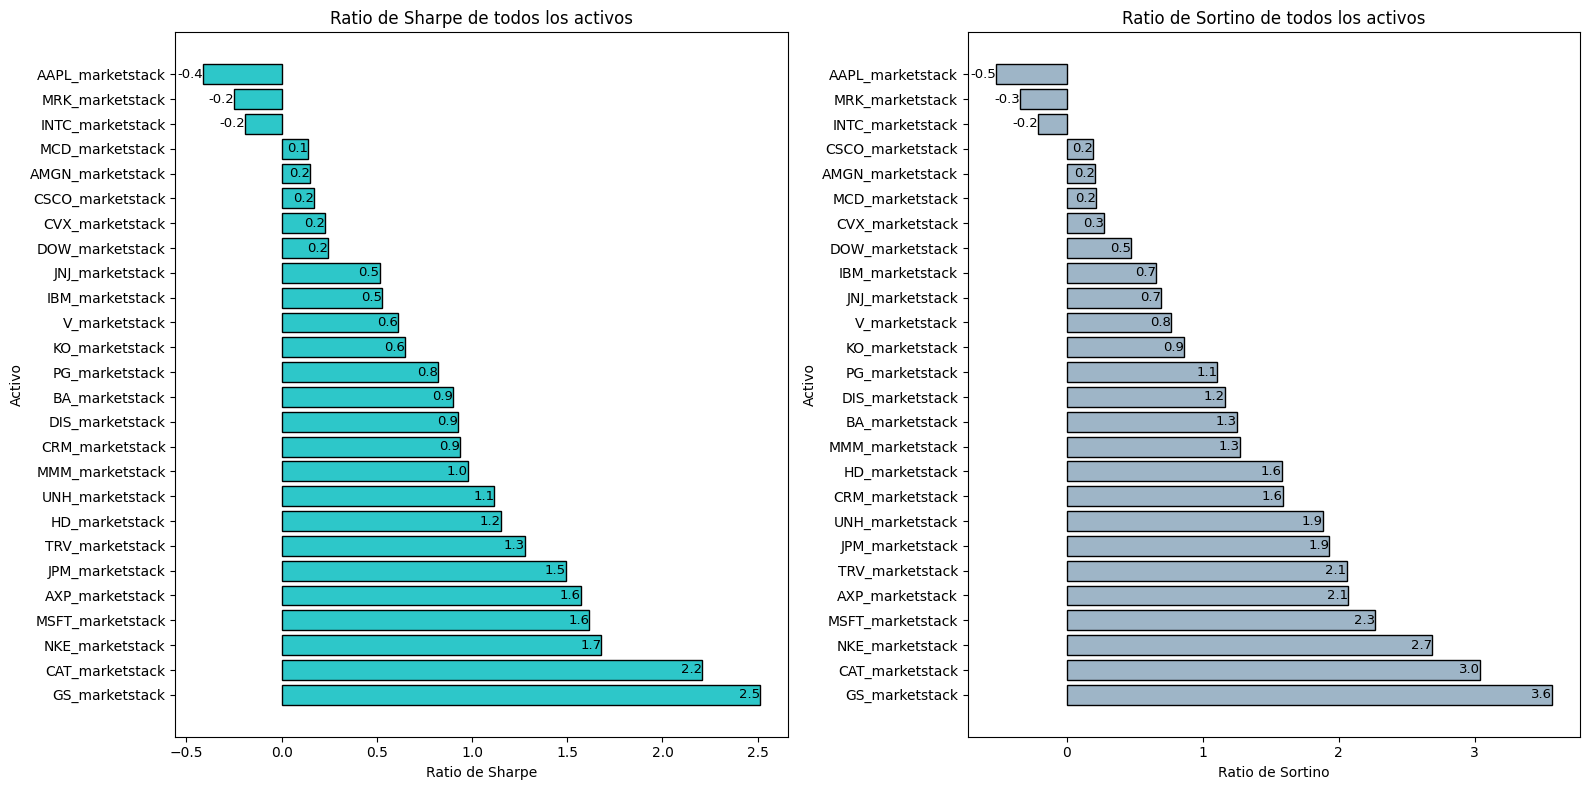

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras - Ratio de Sharpe
resultados_df.sort_values(by='Ratio de Sharpe', ascending=False, inplace=True)
sharpe_bars = ax1.barh(resultados_df.index, resultados_df['Ratio de Sharpe'], color='#2dc7c9', edgecolor='black')
ax1.set_xlabel('Ratio de Sharpe')
ax1.set_title('Ratio de Sharpe de todos los activos')
ax1.set_ylabel('Activo')


for bar in sharpe_bars:
    width = bar.get_width()
    label_x_pos = width - 0.0  # Ajusta la posición de la etiqueta numérica dentro de la barra
    ax1.annotate(f'{width:.1f}', (label_x_pos, bar.get_y() + bar.get_height() / 2),
                 color='black', fontsize=9.5, va='center', ha='right')

# Gráfico de barras - Ratio de Sortino
resultados_df.sort_values(by='Ratio Sortino', ascending=False, inplace=True)
sortino_bars = ax2.barh(resultados_df.index, resultados_df['Ratio Sortino'], color=colores[0], edgecolor='black')
ax2.set_title('Ratio de Sortino de todos los activos')
ax2.set_xlabel('Ratio de Sortino')
ax2.set_ylabel('Activo')


for bar in sortino_bars:
    width = bar.get_width()
    label_x_pos = width - 0.0 # Ajusta la posición de la etiqueta numérica dentro de la barra
    ax2.annotate(f'{width:.1f}', (label_x_pos, bar.get_y() + bar.get_height() / 2),
                 color='black', fontsize=9.5, va='center', ha='right')

plt.tight_layout()
plt.show()

In [9]:
# #Grafico de burbujas de rentabilidad anual y volatilidad anual el tamaño con el ratio de sharpe y color con el ratio de sortino
# resultados_df['Ratio de Sharpe'].sort_values(ascending=False)
# resultados_df['Ratio Sortino'].sort_values(ascending=False)
# resultados_df['Rentabilidad Anual'].sort_values(ascending=False)
# resultados_df['Volatilidad Anual'].sort_values(ascending=False)

# fig, ax = plt.subplots(figsize=(12, 8))

# # Gráfico de burbujas hacer mas grandes las burbujas
# bubble_plot = ax.scatter(resultados_df['Volatilidad Anual'], resultados_df['Rentabilidad Anual'], 
#                          s=resultados_df['Ratio de Sharpe']*100, c=resultados_df['Ratio Sortino'], cmap='RdYlGn', edgecolor='black')
# #Poner en el centro de la burbuja el nombre del activo
# for i, txt in enumerate(resultados_df.index):
#     ax.annotate(txt, (resultados_df['Volatilidad Anual'][i], resultados_df['Rentabilidad Anual'][i]),
#                 xytext=(10, 0), textcoords='offset points', fontsize=9.5, ha='left', va='center')
# #Corregir eje x
# ax.set_xlim(0, 0.8)
# #Corregir eje y
# ax.set_ylim(-0.2, 0.6)

                         

In [10]:
columnas=[i for i in dataframes.keys()]
df_cor=pd.DataFrame(columns=columnas)
for nombre_df, df in dataframes.items():
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df_cor[nombre_df]=df

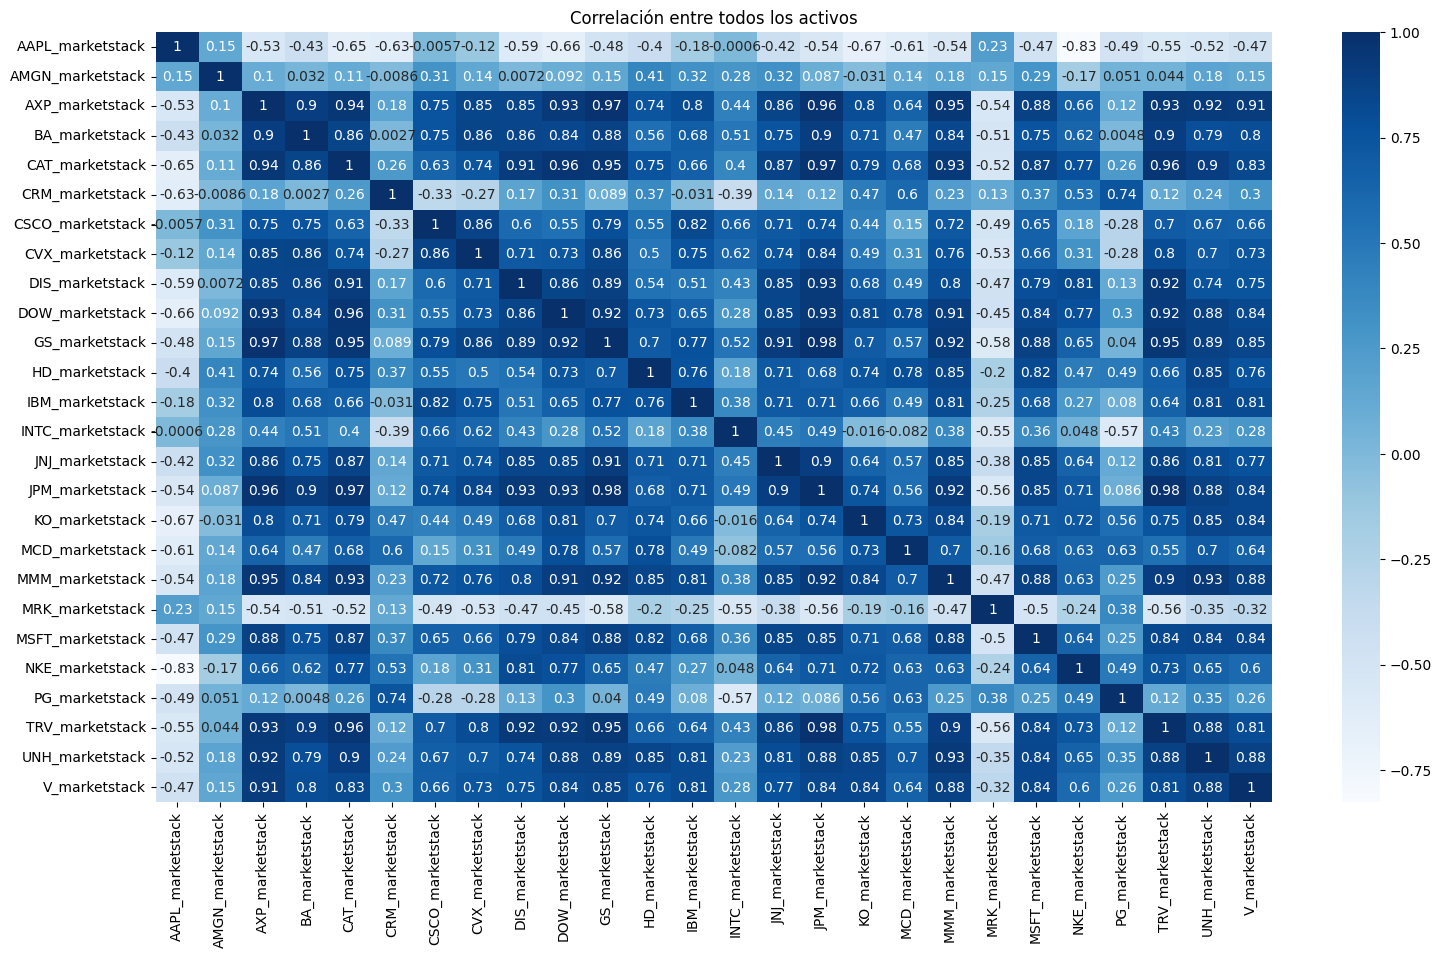

In [11]:
#Correlacion entre los activos
df_cor.corr()
#Gráfico de correlación
plt.figure(figsize=(18, 10))
sns.heatmap(df_cor.corr(), annot=True, cmap='Blues')
plt.title('Correlación entre todos los activos')
plt.show()


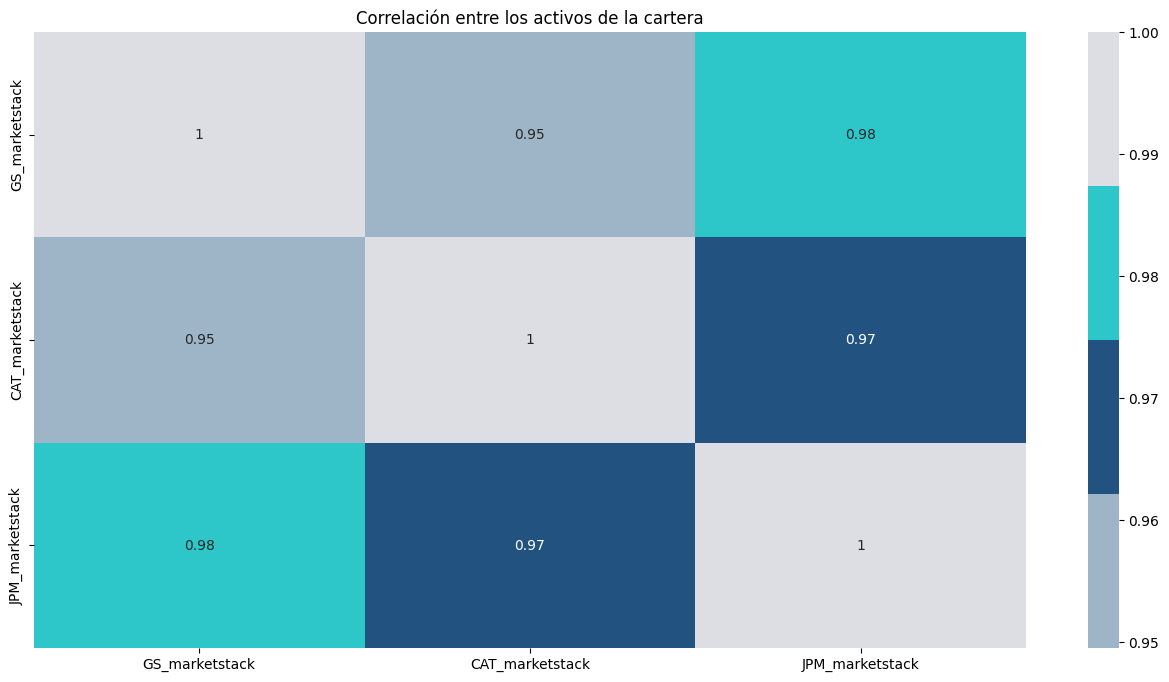

In [12]:

# DataFrame de correlación (reemplaza esto con tu propio DataFrame)

df_cor = df_cor[['GS_marketstack', 'CAT_marketstack', 'JPM_marketstack']]

# Crear el mapa de calor con colores personalizados
plt.figure(figsize=(16, 8))
sns.heatmap(df_cor.corr(), annot=True, cmap=sns.color_palette(colores))
plt.title('Correlación entre los activos de la cartera')
plt.show()


In [13]:
def drawdown(precios, tipo):
    if tipo == 1:
        rtb = precios.pct_change().dropna()
        roll_max = rtb.rolling(center=False, min_periods=1, window=252).max()
        daily_draw_down = rtb/roll_max -1
        max_daily_draw_down = daily_draw_down.rolling(center=False, min_periods=1, window=252).min()
        fig, ax = plt.subplots(figsize = (16,8))
        ax.plot(rtb.index, daily_draw_down, label="Daily drawdown",color=colores[0])
        ax.plot(rtb.index, max_daily_draw_down, label="Maximum daily draw down in time window",color=colores[2])
        ax.legend()
        plt.show()
        return daily_draw_down, max_daily_draw_down
    if tipo == 2:
        roll_max = precios.rolling(center=False, min_periods=1, window=252).max()
        daily_draw_down = precios/roll_max -1
        max_daily_draw_down = daily_draw_down.rolling(center=False, min_periods=1, window=252).min()
        fig, ax = plt.subplots(figsize = (16,8))
        ax.plot(precios.index, daily_draw_down, label="Daily drawdown",color=colores[0])
        ax.plot(precios.index, max_daily_draw_down, label="Maximum daily draw down in time window",color=colores[2])
        ax.set_ylim(-0.5,0.2)
        ax.legend()
        plt.show()
        return daily_draw_down, max_daily_draw_down
    else:
        rtb = precios.pct_change().dropna()
        roll_max = rtb.rolling(center=False, min_periods=1, window=252).max()
        daily_draw_down = rtb/roll_max -1
        max_daily_draw_down = daily_draw_down.rolling(center=False, min_periods=1, window=252).min()
        return daily_draw_down, max_daily_draw_down

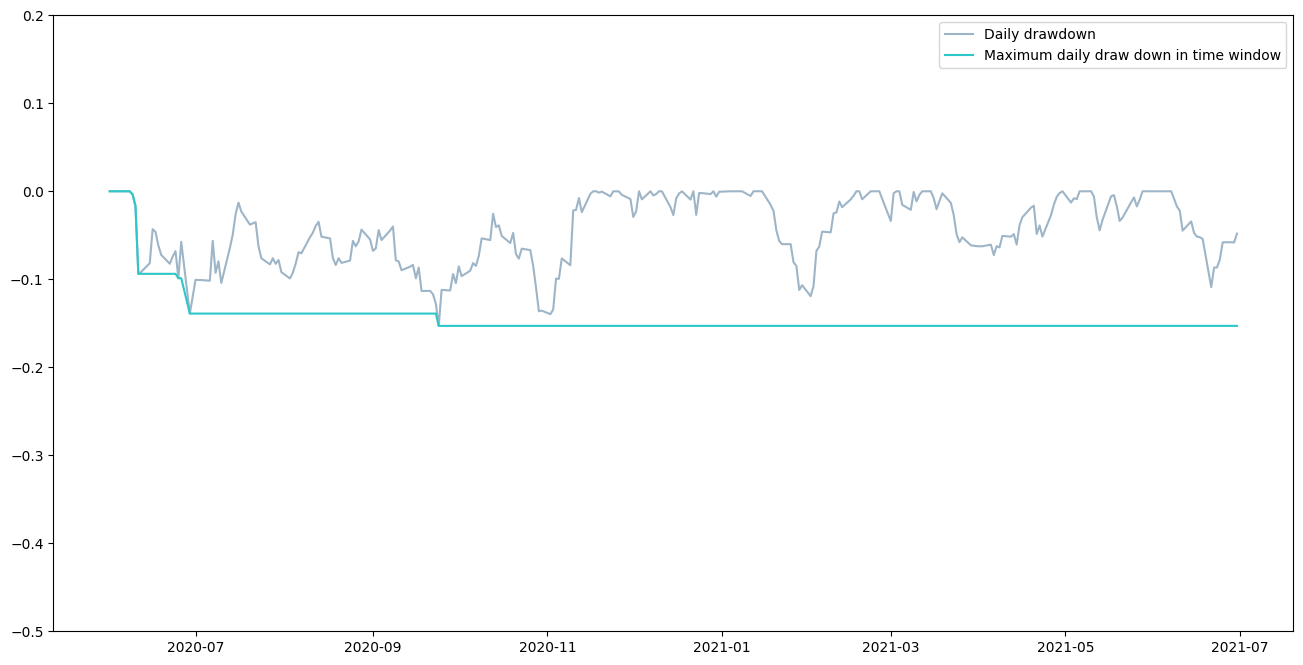

(                           close_cubic
 date                                  
 2020-06-01 00:00:00+00:00     0.000000
 2020-06-02 00:00:00+00:00     0.000000
 2020-06-03 00:00:00+00:00     0.000000
 2020-06-04 00:00:00+00:00     0.000000
 2020-06-05 00:00:00+00:00     0.000000
 ...                                ...
 2021-06-24 00:00:00+00:00    -0.077660
 2021-06-25 00:00:00+00:00    -0.057990
 2021-06-28 00:00:00+00:00    -0.057938
 2021-06-29 00:00:00+00:00    -0.058092
 2021-06-30 00:00:00+00:00    -0.048103
 
 [283 rows x 1 columns],
                            close_cubic
 date                                  
 2020-06-01 00:00:00+00:00      0.00000
 2020-06-02 00:00:00+00:00      0.00000
 2020-06-03 00:00:00+00:00      0.00000
 2020-06-04 00:00:00+00:00      0.00000
 2020-06-05 00:00:00+00:00      0.00000
 ...                                ...
 2021-06-24 00:00:00+00:00     -0.15296
 2021-06-25 00:00:00+00:00     -0.15296
 2021-06-28 00:00:00+00:00     -0.15296
 2021-06-29 0

In [14]:
drawdown(GS_marketstack,2)

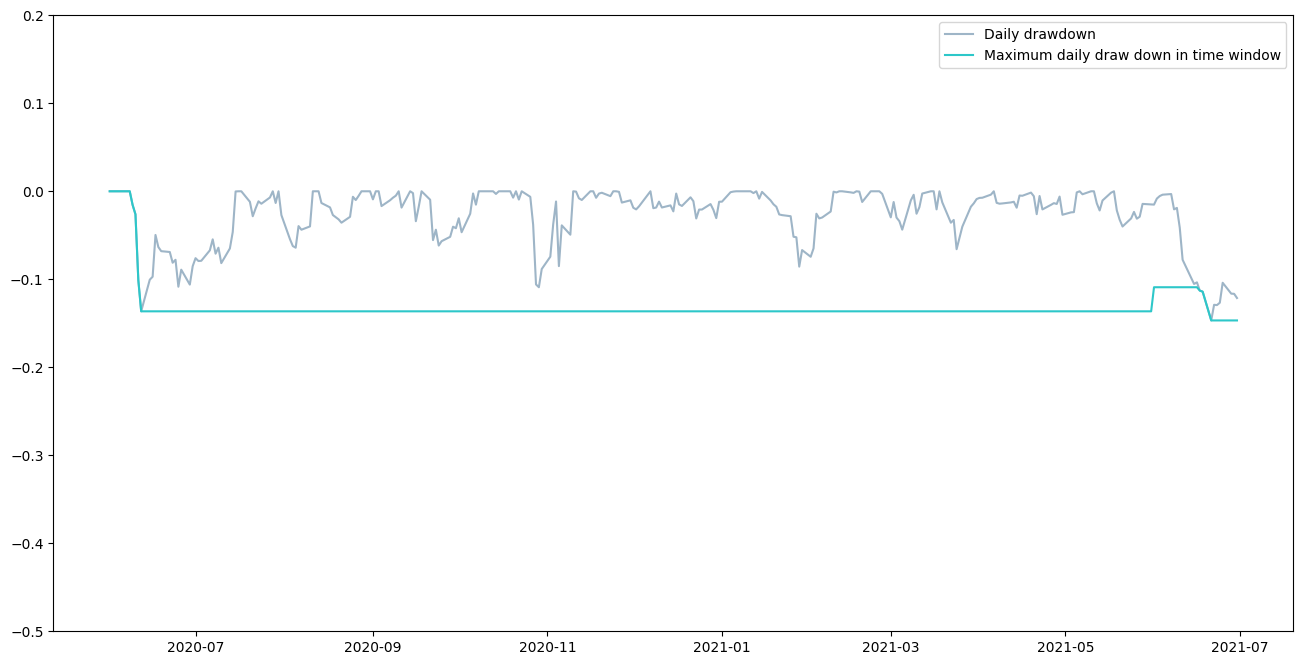

(                           close_cubic
 date                                  
 2020-06-01 00:00:00+00:00     0.000000
 2020-06-02 00:00:00+00:00     0.000000
 2020-06-03 00:00:00+00:00     0.000000
 2020-06-04 00:00:00+00:00     0.000000
 2020-06-05 00:00:00+00:00     0.000000
 ...                                ...
 2021-06-24 00:00:00+00:00    -0.126639
 2021-06-25 00:00:00+00:00    -0.103967
 2021-06-28 00:00:00+00:00    -0.116345
 2021-06-29 00:00:00+00:00    -0.116508
 2021-06-30 00:00:00+00:00    -0.121288
 
 [283 rows x 1 columns],
                            close_cubic
 date                                  
 2020-06-01 00:00:00+00:00     0.000000
 2020-06-02 00:00:00+00:00     0.000000
 2020-06-03 00:00:00+00:00     0.000000
 2020-06-04 00:00:00+00:00     0.000000
 2020-06-05 00:00:00+00:00     0.000000
 ...                                ...
 2021-06-24 00:00:00+00:00    -0.146779
 2021-06-25 00:00:00+00:00    -0.146779
 2021-06-28 00:00:00+00:00    -0.146779
 2021-06-29 0

In [15]:
drawdown(CAT_marketstack,2)

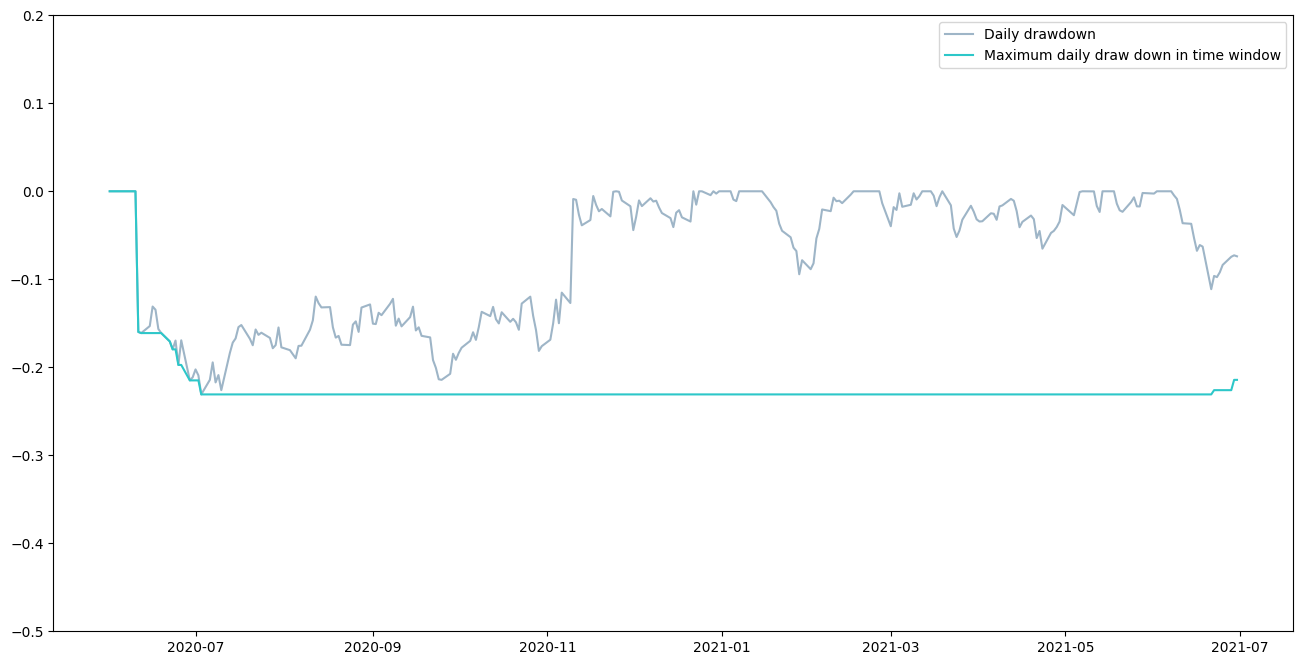

(                           close_cubic
 date                                  
 2020-06-01 00:00:00+00:00     0.000000
 2020-06-02 00:00:00+00:00     0.000000
 2020-06-03 00:00:00+00:00     0.000000
 2020-06-04 00:00:00+00:00     0.000000
 2020-06-05 00:00:00+00:00     0.000000
 ...                                ...
 2021-06-24 00:00:00+00:00    -0.092045
 2021-06-25 00:00:00+00:00    -0.083694
 2021-06-28 00:00:00+00:00    -0.074441
 2021-06-29 00:00:00+00:00    -0.072759
 2021-06-30 00:00:00+00:00    -0.073901
 
 [283 rows x 1 columns],
                            close_cubic
 date                                  
 2020-06-01 00:00:00+00:00     0.000000
 2020-06-02 00:00:00+00:00     0.000000
 2020-06-03 00:00:00+00:00     0.000000
 2020-06-04 00:00:00+00:00     0.000000
 2020-06-05 00:00:00+00:00     0.000000
 ...                                ...
 2021-06-24 00:00:00+00:00    -0.226004
 2021-06-25 00:00:00+00:00    -0.226004
 2021-06-28 00:00:00+00:00    -0.226004
 2021-06-29 0

In [16]:
drawdown(JPM_marketstack,2)

3. Analisis de la cartera

In [17]:
#crear df de los tres activos seleccionados y sus precios
portfolio=pd.concat([CAT_marketstack, JPM_marketstack, GS_marketstack], axis=1)
portfolio


,close_cubic,close_cubic,close_cubic
date,,,
2020-06-01 00:00:00+00:00,120.1300,97.310000,196.4900
2020-06-02 00:00:00+00:00,122.9825,98.600000,203.0225
2020-06-03 00:00:00+00:00,126.5300,99.762098,209.9100
2020-06-04 00:00:00+00:00,127.0900,104.270000,211.3250
2020-06-05 00:00:00+00:00,134.5200,106.440000,219.6500
...,...,...,...
2021-06-24 00:00:00+00:00,213.7900,151.120000,361.0500
2021-06-25 00:00:00+00:00,219.3400,152.510000,368.7500
2021-06-28 00:00:00+00:00,216.3100,154.050000,368.7700


In [18]:
def cartera(precios, pesos):

  # Calcular las rentabilidades diarias de la cartera
  rent_activos = precios.pct_change().dropna() #calcular la rentabilidad de cada activo
  rent_cartera = rent_activos.dot(pesos.T) #multiplicar por un vector de pesos

  # Calcular la matriz de covarianza anualizada
  covarianza = rent_activos.cov(ddof=0) * np.sqrt(252) #calcular covarianza de los rendimientos, si haceis con precios también bien DA MÁS GRANDE !!

  # Calcular la volatilidad anualizada de la cartera
  volatilidad_portfolio = np.sqrt(pesos.T @ covarianza @ pesos)
  volatilidad_portfolio_anualizada = volatilidad_portfolio * np.sqrt(252)
  # Calcular la rentabilidad acumulada
  rtb_acu = (1+rent_cartera).cumprod()

  # Calcular la rentabilidad anualizada
  r = ((rtb_acu.iloc[-1]-rtb_acu.iloc[0]) / rtb_acu.iloc[0])
  rent_anualizada = ((1+r)**(252/len(precios)))-1

  return volatilidad_portfolio, rent_cartera, rtb_acu, rent_anualizada, volatilidad_portfolio_anualizada

In [19]:
pesos=np.array([1/3, 1/3,1/3])
volatilidad_portfolio = cartera(portfolio,pesos)[0]
rent_cartera = cartera(portfolio['close_cubic'],pesos)[1]
rtb_acu = cartera(portfolio['close_cubic'], pesos)[2]
rent_anualizada = cartera(portfolio['close_cubic'], pesos)[3]
volatilidad_portfolio_anualizada = cartera(portfolio, pesos)[4]

In [20]:
rent_anualizada

0.6319974713994525

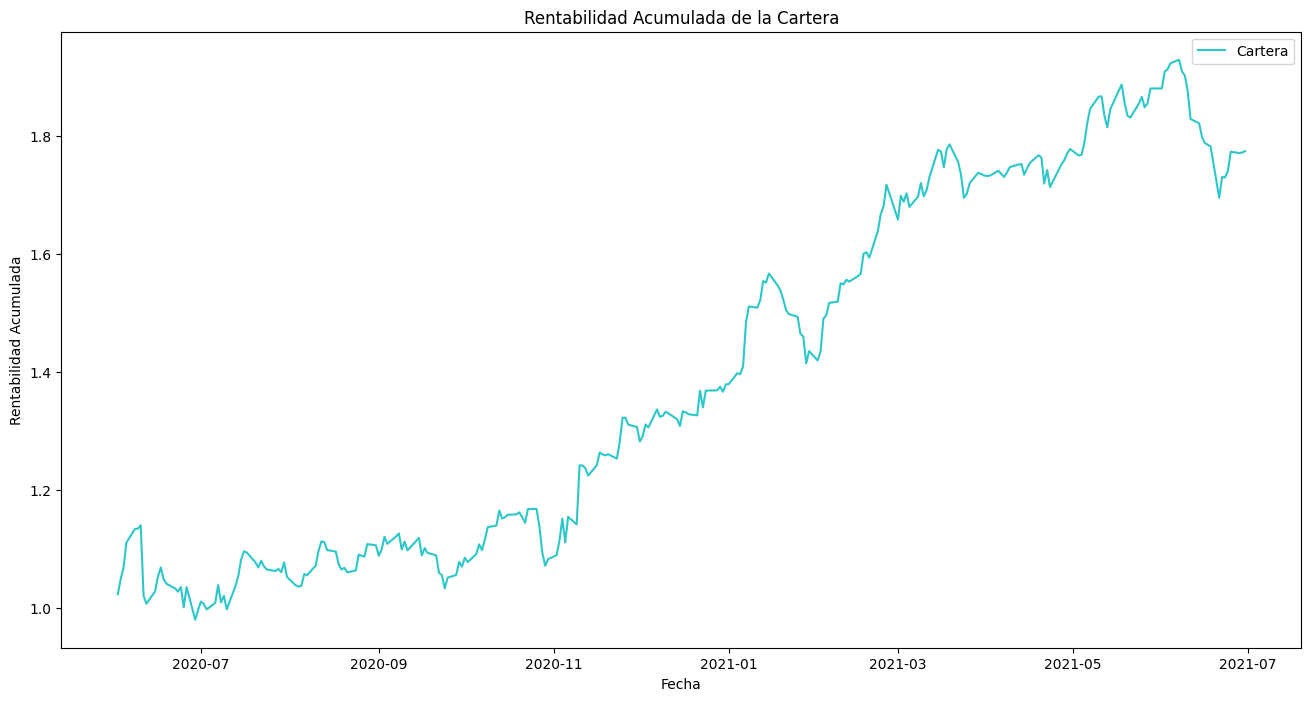

In [21]:
#Grafico de la rentabilidad acumulada de la cartera
rtb_acu = cartera(portfolio['close_cubic'], pesos)[2]

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(rtb_acu.index, rtb_acu, color='#2dc7c9', label="Cartera")
ax.set_xlabel("Fecha")
ax.set_ylabel("Rentabilidad Acumulada")
ax.set_title("Rentabilidad Acumulada de la Cartera")
plt.legend()
plt.show()

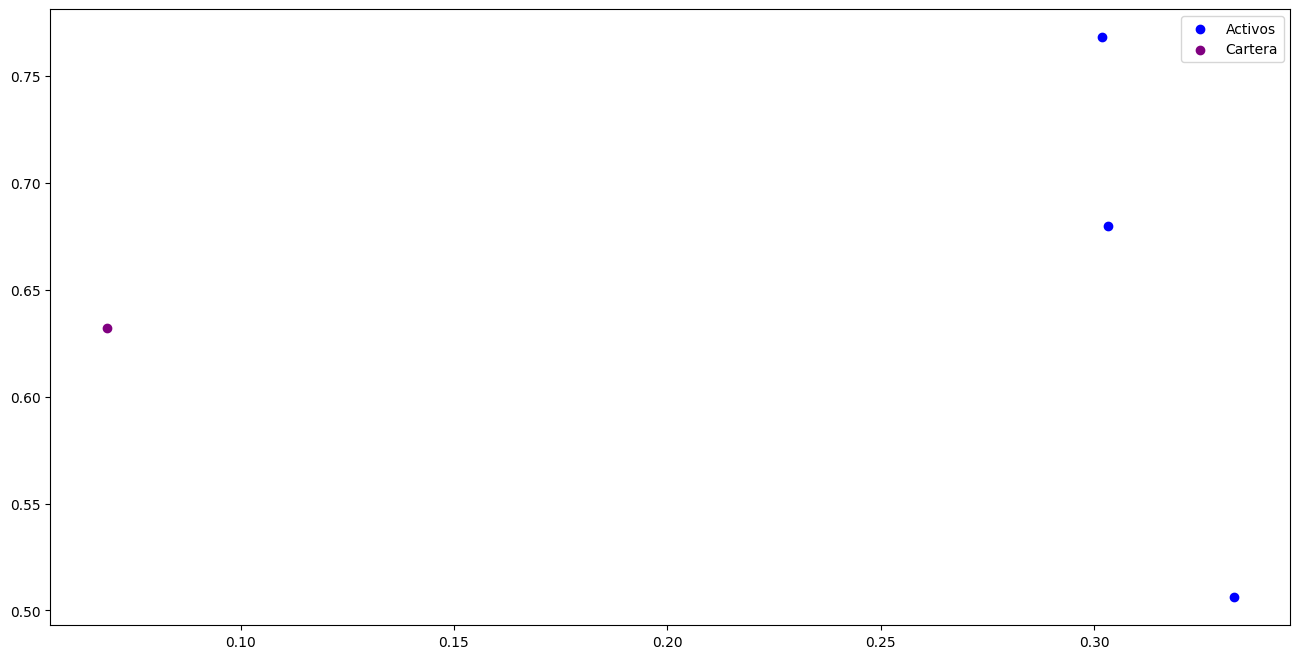

In [22]:
# Gráfico Riesgo-Rentabilidad
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_activos['Volatilidad Anual'], df_activos['Rentabilidad Anual'], label='Activos', color='blue')
ax.scatter(volatilidad_portfolio, rent_anualizada, label='Cartera', color='purple')
plt.legend()
plt.show()

In [23]:
def rtb_anualizada(tipo, n, p0, p1, dias_habiles): #n es cuanto tenemos (5 años)
  if tipo == 'd':
    r=(p1-p0)/p0
    return ((1+r)**(dias_habiles/n))-1

  if tipo == 'm':
    r=(p1-p0)/p0
    return ((1+r)**(12/n))-1

  if tipo == 'y':
     r=(p1-p0)/p0
     return ((1+r)**(1/n))-1

  else:
    print("Por favor, introduzca 'd', 'm' o 'y' en el tipo")
  return

In [24]:
def ratio_sortino(precios, rf, target):
    rtbs = precios.pct_change().dropna()
    y_rtb = rtb_anualizada('d', len(precios.index), precios[0], precios[-1], 252)
    down_rtbs = rtbs.loc[rtbs < target]
    down_std = down_rtbs.std(ddof=0)*np.sqrt(252)
    sortino = (y_rtb - rf) / down_std
    data = [sortino, y_rtb, down_std]
    return data

In [25]:
ratio_sortino(rtb_acu, 0.01, 0.005)

[3.101496274439453, 0.6348345446204748, 0.20146229088519668]

In [26]:
day_rent = portfolio['close_cubic'].pct_change()
day_rent  = day_rent.dropna()
day_rent

,close_cubic,close_cubic,close_cubic
date,,,
2020-06-02 00:00:00+00:00,0.023745,0.013257,0.033246
2020-06-03 00:00:00+00:00,0.028846,0.011786,0.033925
2020-06-04 00:00:00+00:00,0.004426,0.045187,0.006741
2020-06-05 00:00:00+00:00,0.058463,0.020811,0.039394
2020-06-08 00:00:00+00:00,0.017748,0.045002,0.000364
...,...,...,...
2021-06-24 00:00:00+00:00,0.003097,0.006058,0.009845
2021-06-25 00:00:00+00:00,0.025960,0.009198,0.021327
2021-06-28 00:00:00+00:00,-0.013814,0.010098,0.000054


In [27]:
def ratio_sharpe(precios, rf, tipo_datos):
    sharpe = rtb_anualizada(tipo_datos, len(precios.index), precios[0], precios[-1], 252) / (day_rent.std(ddof=0) * np.sqrt(252))
    return sharpe

In [28]:
ratio_sharpe(rtb_acu, 0.01, 'd')

close_cubic    2.098773
close_cubic    1.928587
close_cubic    2.108367
dtype: float64

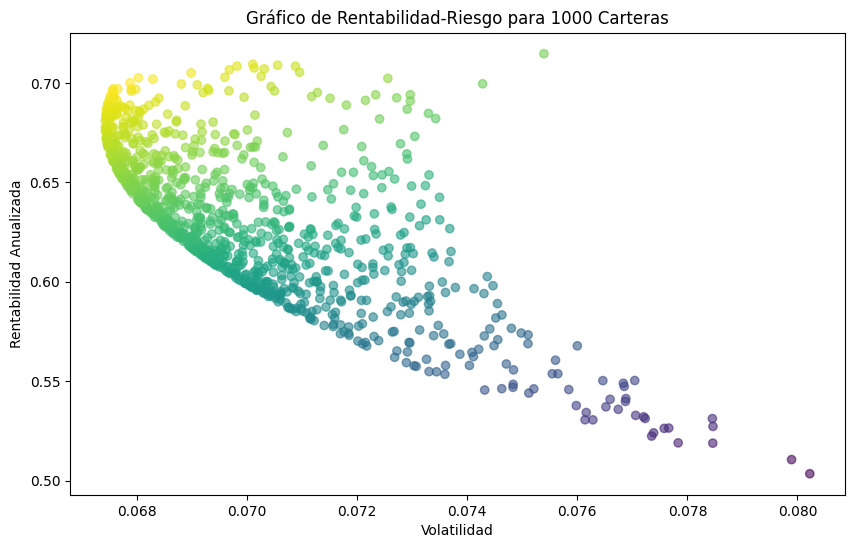

In [29]:
#Simula ahora 1000 carteras con diferentes pesos (aleatorios) para cada uno de los activos.
num_carteras = 1000
simulaciones = []
volatilidades = []
rentabilidades = []
rf=0.01
sharpes = []
for i in range(num_carteras):
    pesos_aleatorios = np.random.rand(3)
    pesos_aleatorios = pesos_aleatorios / pesos_aleatorios.sum()
    simulaciones.append(pesos_aleatorios)
    volatilidad_portfolio, _, rtb_acu, rent_anualizada, _ = cartera(portfolio, pesos_aleatorios)
    ratio_sharpe=(np.array(rent_anualizada-rf)/volatilidad_portfolio)
    volatilidades.append(volatilidad_portfolio)
    rentabilidades.append(rent_anualizada)
    sharpes.append(ratio_sharpe)

# Gráfico de rentabilidad-riesgo para las 1000 carteras
plt.figure(figsize=(10, 6))
plt.scatter(volatilidades, rentabilidades, c=sharpes,alpha=0.6)
plt.title('Gráfico de Rentabilidad-Riesgo para 1000 Carteras')
plt.xlabel('Volatilidad')
plt.ylabel('Rentabilidad Anualizada')
plt.show()